<a href="https://colab.research.google.com/github/nabhylanr/ISPU-Classification/blob/main/ispu_classification_smote.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

## Load Dataset

In [2]:
url = "https://raw.githubusercontent.com/nabhylanr/ISPU-Classification/main/data-indeks-standar-pencemar-udara-(ispu)-di-provinsi-dki-jakarta-(merged).csv"
df = pd.read_csv(url)

## Exploratory Data Analysis

### Informasi Dataset

In [3]:
df.head(10)

,parameter_pencemar_kritis,kategori,periode_data,bulan,tanggal,stasiun,pm_sepuluh,pm_duakomalima,sulfur_dioksida,karbon_monoksida,ozon,nitrogen_dioksida,max
0,O3,SEDANG,201105,5.0,1.0,DKI1,71,NaN,18,54,88,31,88
1,O3,SEDANG,201105,5.0,2.0,DKI4,61,NaN,19,35,98,29,98
2,PM10,SEDANG,201105,5.0,3.0,DKI1,69,NaN,22,31,69,28,69
3,PM10,SEDANG,201105,5.0,4.0,DKI4,63,NaN,18,26,47,17,63
4,PM10,SEDANG,201105,5.0,5.0,DKI4,76,NaN,17,28,63,20,76
5,O3,SEDANG,201105,5.0,6.0,DKI2,58,NaN,22,36,65,23,65
6,O3,SEDANG,201105,5.0,7.0,DKI4,63,NaN,22,38,66,14,66
7,PM10,SEDANG,201105,5.0,8.0,DKI4,56,NaN,15,42,50,13,56
8,O3,TIDAK SEHAT,201105,5.0,9.0,DKI4,51,NaN,9,20,153,27,153
9,O3,TIDAK SEHAT,201105,5.0,10.0,DKI3,78,NaN,20,29,137,24,137


Fitur:
1. periode_data : Penjelasan Periode Data 1 Bulan Sekali
2. bulan : adalah bulan penggambilan data Indeks Standar Pencemar Udara (ISPU)
3. tanggal : adalah tanggal pengambilan data Indeks Standar Pencemar Udara (ISPU)
4. stasiun : adalah lokasi penempatan alat pemantauan udara
5. pm_sepuluh : adalah nilai hasil pengukuran Indeks Standar Pencemar Udara (ISPU) untuk parameter PM10 (nama salah satu nama parameter yang dipantau) yaitu Partikulat dengan ukuran di bawah 10 mikron
6. pm_duakomalima : adalah nilai hasil pengukuran Indeks Standar Pencemar Udara (ISPU) untuk parameter PM2.5 (nama salah satu nama parameter yang dipantau), yaitu Partikulat dengan ukuran di bawah 2.5 mikron
7. sulfur_dioksida : adalah nilai hasil pengukuran Indeks Standar Pencemar Udara (ISPU) untuk parameter sulfur dioksida/ SO2 (nama salah satu nama parameter yang dipantau)
8. karbon_monoksida : adalah nilai hasil pengukuran Indeks Standar Pencemar Udara (ISPU) untuk parameter karbon monoksida/ CO (nama salah satu nama parameter yang dipantau)
9. ozon : adalah nilai hasil pengukuran Indeks Standar Pencemar Udara (ISPU) untuk parameter ozon/ O3 (nama salah satu nama parameter yang dipantau)
10. nitrogen_dioksida : adalah nilai hasil pengukuran Indeks Standar Pencemar Udara (ISPU) untuk parameter nitrogen dioksida/ NO2 (nama salah satu nama parameter yang dipantau)
11. max : adalah nilai tertinggi hasil pengukuran Indeks Standar Pencemar Udara (ISPU) dari beberapa parameter yang dipantau pada Stasiun Pemantau Kualitas Udara (SPKU) dan tanggal pengukuran tertentu
12. parameter_pencemar_kritis : adalah nama parameter yang dipantau yang hasil nilai Indeks Standar Pencemar Udara (ISPU) nya paling tinggi pada Stasiun Pemantau Kualitas Udara (SPKU) dan tanggal tertentu
13. kategori : adalah kategori hasil pengukuran Indeks Standar Pencemar Udara (ISPU) pada Stasiun Pemantau Kualitas Udara (SPKU) dan tanggal tertentu

In [4]:
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

Jumlah baris: 13403
Jumlah kolom: 13


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13403 entries, 0 to 13402
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   parameter_pencemar_kritis  13252 non-null  object 
 1   kategori                   13401 non-null  object 
 2   periode_data               13403 non-null  int64  
 3   bulan                      13402 non-null  float64
 4   tanggal                    13402 non-null  float64
 5   stasiun                    13403 non-null  object 
 6   pm_sepuluh                 13118 non-null  object 
 7   pm_duakomalima             6758 non-null   float64
 8   sulfur_dioksida            13235 non-null  object 
 9   karbon_monoksida           13320 non-null  object 
 10  ozon                       13291 non-null  object 
 11  nitrogen_dioksida          13301 non-null  object 
 12  max                        13394 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usag

In [6]:
num_cols = [
    'pm_sepuluh', 'pm_duakomalima', 'sulfur_dioksida',
    'karbon_monoksida', 'ozon', 'nitrogen_dioksida'
]

for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13403 entries, 0 to 13402
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   parameter_pencemar_kritis  13252 non-null  object 
 1   kategori                   13401 non-null  object 
 2   periode_data               13403 non-null  int64  
 3   bulan                      13402 non-null  float64
 4   tanggal                    13402 non-null  float64
 5   stasiun                    13403 non-null  object 
 6   pm_sepuluh                 12653 non-null  float64
 7   pm_duakomalima             6758 non-null   float64
 8   sulfur_dioksida            13029 non-null  float64
 9   karbon_monoksida           13092 non-null  float64
 10  ozon                       13068 non-null  float64
 11  nitrogen_dioksida          13032 non-null  float64
 12  max                        13394 non-null  object 
dtypes: float64(8), int64(1), object(4)
memory usag

In [8]:
df.describe()

,periode_data,bulan,tanggal,pm_sepuluh,pm_duakomalima,sulfur_dioksida,karbon_monoksida,ozon,nitrogen_dioksida
count,13403.000000,13402.000000,13402.000000,12653.000000,6758.000000,13029.000000,13092.000000,13068.000000,13032.000000
mean,201987.554055,6.340621,15.745187,54.794989,76.014501,31.113670,19.439887,51.902433,18.063920
std,396.112628,3.389080,8.778186,18.584122,23.975428,14.628064,11.885038,41.849390,12.382483
min,201101.000000,1.000000,1.000000,2.000000,10.000000,1.000000,0.000000,2.000000,0.000000
25%,201701.000000,3.000000,8.000000,44.000000,60.000000,20.000000,11.000000,23.000000,10.000000
50%,202104.000000,6.000000,16.000000,55.000000,77.000000,28.000000,17.000000,37.000000,16.000000
75%,202310.000000,9.000000,23.000000,65.000000,91.000000,42.000000,25.000000,70.000000,23.000000
max,202509.000000,12.000000,31.000000,187.000000,287.000000,112.000000,134.000000,314.000000,202.000000


### Distribution Target Variable (Kategori)

In [9]:
print("Distribusi target variabel")
print(df['kategori'].value_counts())

print("\nPersentase:")
print(df['kategori'].value_counts(normalize=True) * 100)

Distribusi target variabel
kategori
SEDANG                9017
TIDAK SEHAT           2278
BAIK                  1764
SANGAT TIDAK SEHAT     188
TIDAK ADA DATA         122
O3                      31
BERBAHAYA                1
Name: count, dtype: int64

Persentase:
kategori
SEDANG                67.286023
TIDAK SEHAT           16.998731
BAIK                  13.163197
SANGAT TIDAK SEHAT     1.402880
TIDAK ADA DATA         0.910380
O3                     0.231326
BERBAHAYA              0.007462
Name: proportion, dtype: float64


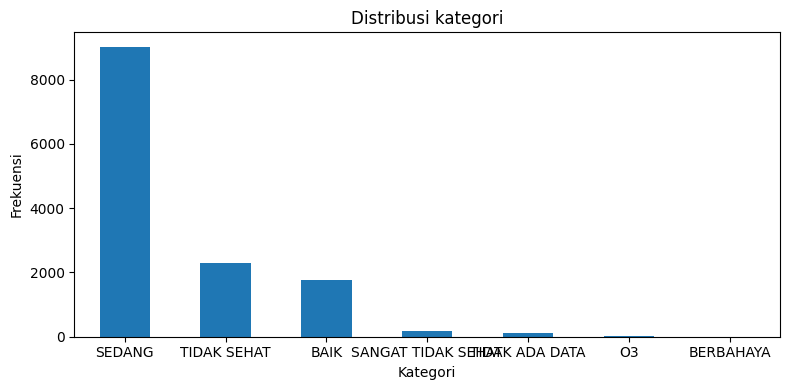

In [10]:
plt.figure(figsize=(8, 4))
df['kategori'].value_counts().plot(kind='bar')
plt.title('Distribusi kategori')
plt.xlabel('Kategori')
plt.ylabel('Frekuensi')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Distribution Chart

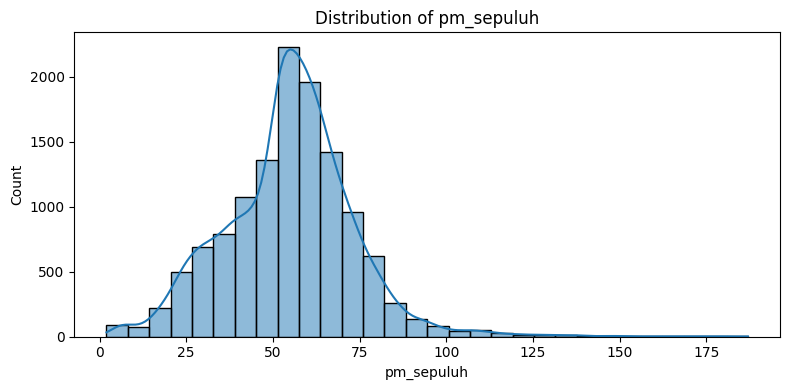

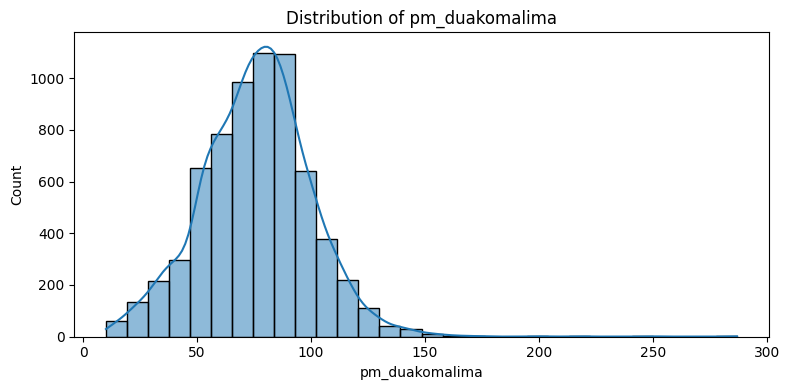

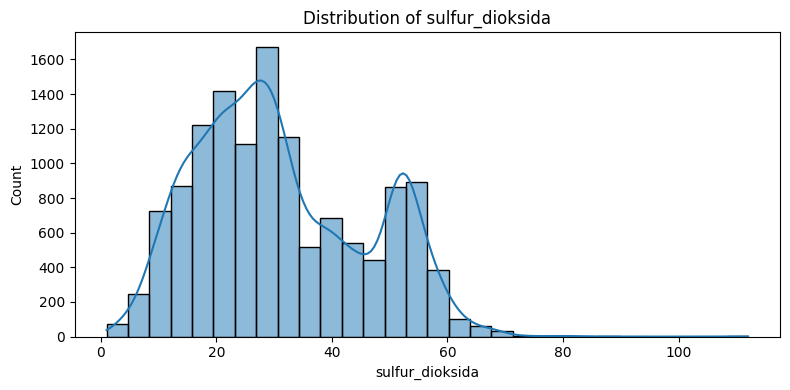

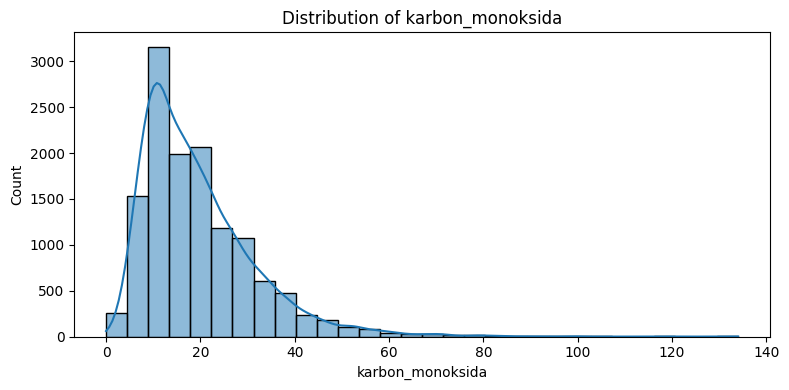

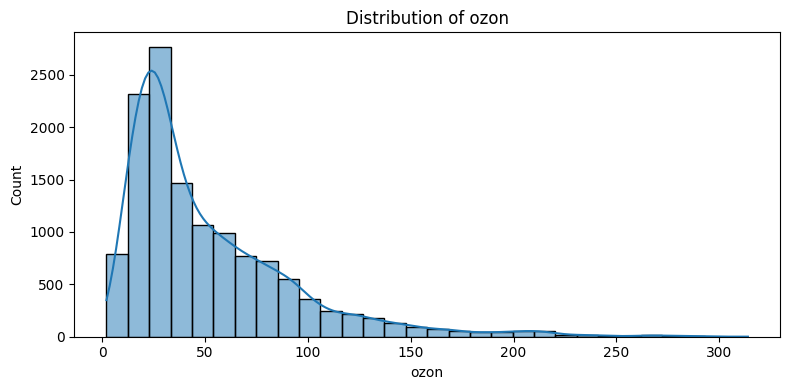

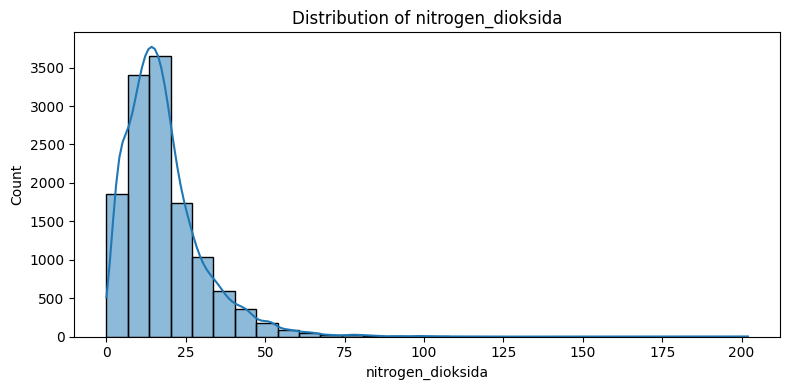

In [11]:
for col in num_cols:
    if col in df.columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.tight_layout()
        plt.show()

### Parameter Type Plot

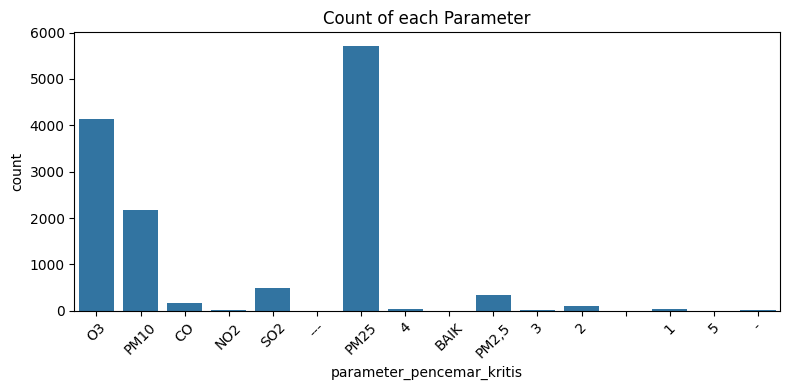

In [12]:
if 'parameter_pencemar_kritis' in df.columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x='parameter_pencemar_kritis', data=df)
    plt.title('Count of each Parameter')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Outlier

In [13]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_mask = (df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))
outlier_count = outlier_mask.sum()

print("Jumlah outlier per fitur:")
print(outlier_count)

Jumlah outlier per fitur:
pm_sepuluh           367
pm_duakomalima        77
sulfur_dioksida        9
karbon_monoksida     429
ozon                 580
nitrogen_dioksida    623
dtype: int64


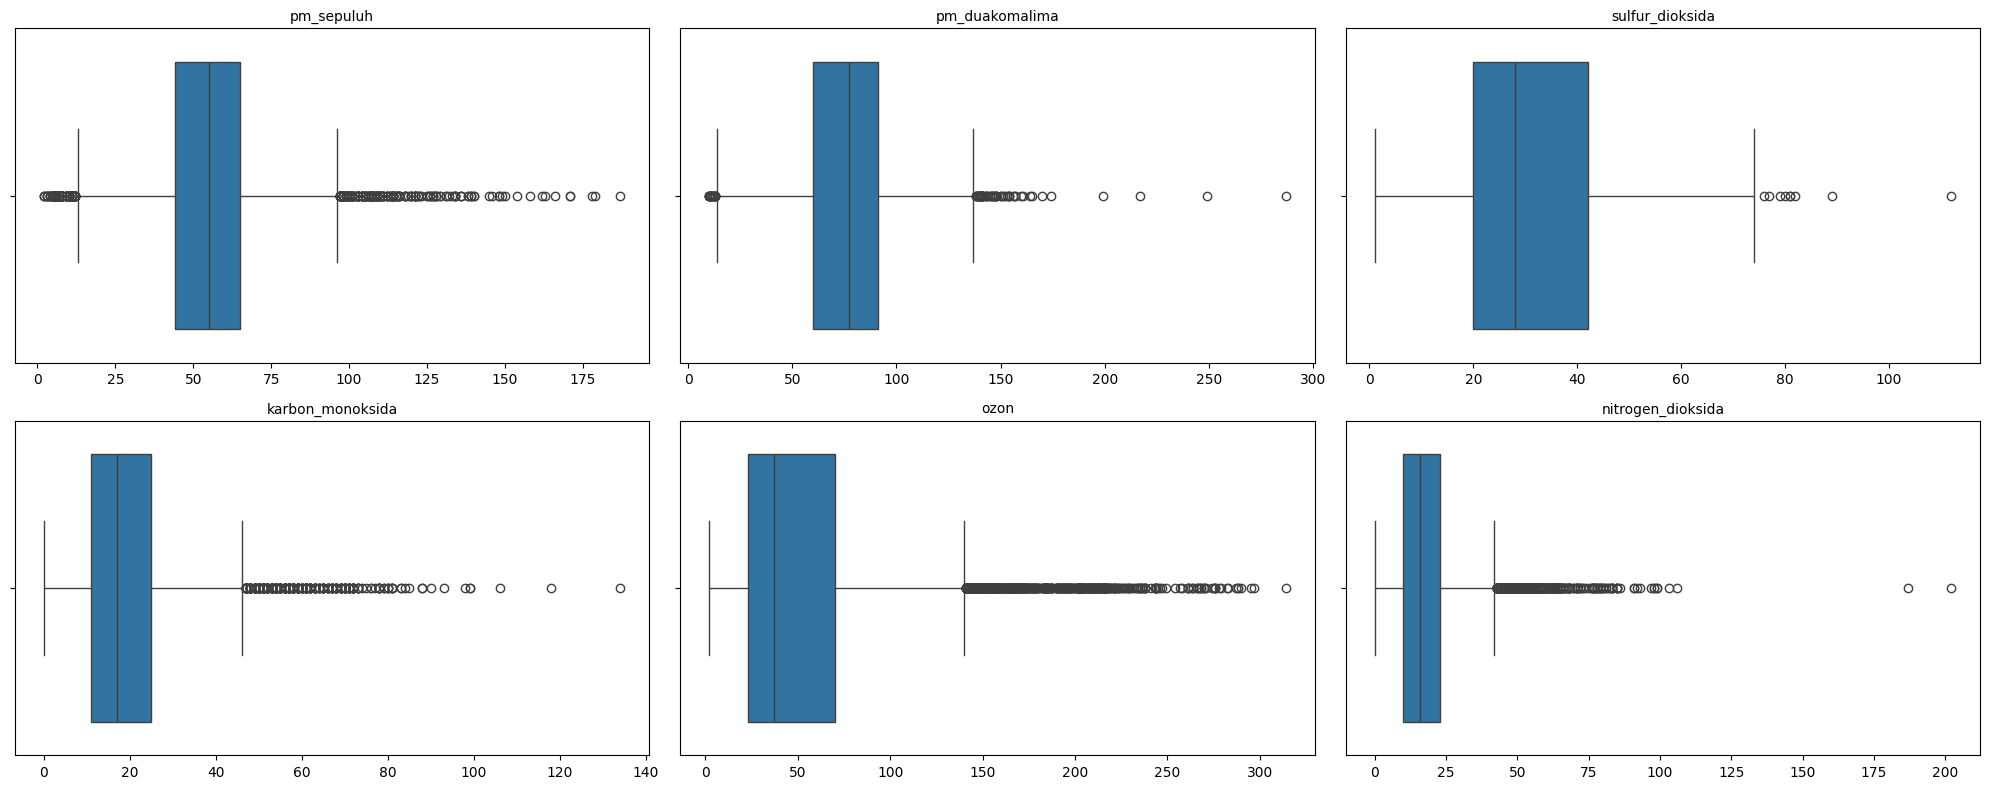

In [14]:
n_cols = 3
n_rows = int(np.ceil(len(num_cols) / n_cols))

plt.figure(figsize=(20, n_rows * 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df[col])
    plt.title(col, fontsize=10)
    plt.xlabel('')
    plt.tight_layout()

plt.show()

### Corr Heatmap

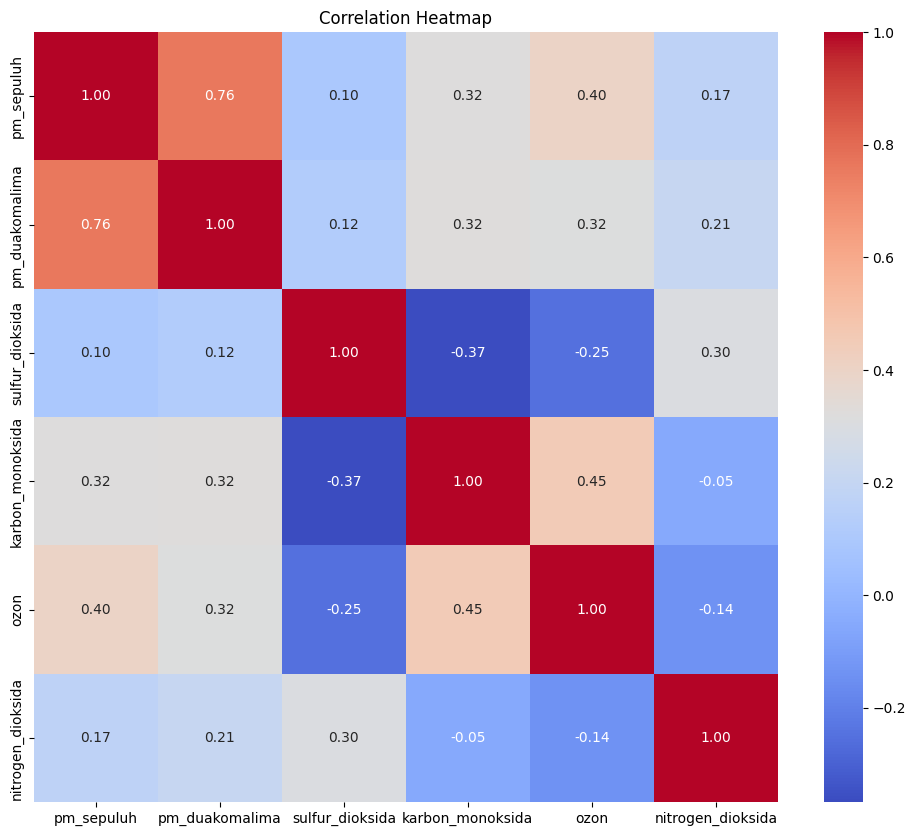

In [15]:
if len(num_cols) >= 4:
    plt.figure(figsize=(12, 10))
    corr = df[num_cols].corr()
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

## Preprocessing

### Cleaning

In [16]:
# drop duplicate
df = df.drop_duplicates()

# drop kategori yang kosong
df = df.dropna(subset=['kategori'])

# drop fitur yang tidak diperlukan
df = df.drop(['periode_data','bulan','tanggal','stasiun', 'max'], axis=1)

# drop kategori tidak ada data dan o3 karena o3 harusnya parameter bukan kategori
df = df[df['kategori'] != 'TIDAK ADA DATA']
df = df[df['kategori'] != 'O3']

# drop kategori < 2
counts = df['kategori'].value_counts()
rare = counts[counts < 2].index
df = df[~df['kategori'].isin(rare)]

In [17]:
print("Distribusi target variabel")
print(df['kategori'].value_counts())

print("\nPersentase:")
print(df['kategori'].value_counts(normalize=True) * 100)

Distribusi target variabel
kategori
SEDANG                9017
TIDAK SEHAT           2278
BAIK                  1764
SANGAT TIDAK SEHAT     188
Name: count, dtype: int64

Persentase:
kategori
SEDANG                68.068242
TIDAK SEHAT           17.196346
BAIK                  13.316223
SANGAT TIDAK SEHAT     1.419189
Name: proportion, dtype: float64


In [18]:
def clean_param(x):
    if pd.isna(x):
        return np.nan

    x = str(x).strip()

    if x in ['PM25', 'PM2,5', 'pm25', 'pm2,5']:
        return 'PM2.5'

    valid = ['PM10', 'PM2.5', 'SO2', 'CO', 'O3', 'NO2']
    if x in valid:
        return x

    if x.isdigit():
        return np.nan

    return np.nan

df['parameter_pencemar_kritis'] = df['parameter_pencemar_kritis'].apply(clean_param)

In [19]:
print("Distribusi parameter")
print(df['parameter_pencemar_kritis'].value_counts())

print("\nPersentase:")
print(df['parameter_pencemar_kritis'].value_counts(normalize=True) * 100)

Distribusi parameter
parameter_pencemar_kritis
PM2.5    6051
O3       4130
PM10     2173
SO2       494
CO        177
NO2        24
Name: count, dtype: int64

Persentase:
parameter_pencemar_kritis
PM2.5    46.371369
O3       31.649935
PM10     16.652617
SO2       3.785731
CO        1.356426
NO2       0.183922
Name: proportion, dtype: float64


### Imputasi

In [20]:
print("Missing value:")
print(df.isnull().sum())

Missing value:
parameter_pencemar_kritis     198
kategori                        0
pm_sepuluh                    627
pm_duakomalima               6490
sulfur_dioksida               238
karbon_monoksida              187
ozon                          212
nitrogen_dioksida             248
dtype: int64


imputasi kolom numerik menggunakan median karena robust terhadap outlier

In [21]:
for col in num_cols:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)

imputasi kolom kategorikal (parameter_pencemar_kritis) menggunakan modus

In [22]:
cat_cols = ['parameter_pencemar_kritis']

for col in cat_cols:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)

In [23]:
print("Missing value:")
print(df.isna().sum())

Missing value:
parameter_pencemar_kritis    0
kategori                     0
pm_sepuluh                   0
pm_duakomalima               0
sulfur_dioksida              0
karbon_monoksida             0
ozon                         0
nitrogen_dioksida            0
dtype: int64


### Splitting

In [24]:
X = df.drop('kategori', axis=1)
y = df['kategori']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### CTABGAN

In [26]:
from model.ctabgan import CTABGAN
import pandas as pd
import numpy as np
import time
import torch
from sklearn.preprocessing import LabelEncoder, RobustScaler

# --- 1. PERSIAPAN DATA ---
train_df = X_train.copy()
train_df['kategori'] = y_train.values 

# Identifikasi Mayoritas
class_counts = train_df['kategori'].value_counts()
majority_class = class_counts.idxmax()
majority_count = class_counts.max()

print("DISTRIBUSI AWAL:")
print(class_counts)
print(f"\nTarget Mayoritas: {majority_class} ({majority_count} data)")
print("-" * 50)

# List untuk menampung data sintetis dari semua kelas
all_synthetic_data = []

# --- 2. LOOPING UNTUK SETIAP KELAS MINORITAS ---
unique_classes = train_df['kategori'].unique()

for cls in unique_classes:
    if cls == majority_class:
        continue # Skip kelas mayoritas
    
    current_count = class_counts[cls]
    num_to_generate = majority_count - current_count
    
    print(f"\n>>> Memproses Kelas: {cls} (Asli: {current_count})")
    print(f"    Target Generate: {num_to_generate} sampel")
    
    # Ambil data khusus kelas ini
    class_df = train_df[train_df['kategori'] == cls]
    TEMP_CSV = f"temp_class_{cls}.csv"
    class_df.to_csv(TEMP_CSV, index=False)
    
    # --- KONFIGURASI KOLOM ---
    categorical_columns = ['parameter_pencemar_kritis', 'kategori']
    
    # Kolom integer (termasuk pm_duakomalima sesuai request)
    integer_columns = [
        'pm_sepuluh', 
        'pm_duakomalima', 
        'sulfur_dioksida', 
        'karbon_monoksida', 
        'ozon', 
        'nitrogen_dioksida'
    ]
    
    log_columns = []
    mixed_columns = {}
    problem_type = {"Classification": 'kategori'}

    # --- LATIH CTAB-GAN ---
    synthesizer = CTABGAN(
        raw_csv_path=TEMP_CSV,
        test_ratio=0.1, 
        categorical_columns=categorical_columns,
        log_columns=log_columns,
        mixed_columns=mixed_columns,
        integer_columns=integer_columns,
        problem_type=problem_type,
        epochs=150 
    )
    
    print(f"    Melatih CTAB-GAN untuk kelas {cls} (Epoch: 150)...")
    start_time = time.time()
    synthesizer.fit()
    print(f"    Selesai training dalam {time.time() - start_time:.2f} detik.")
    
    # --- GENERATE DATA (LOOPING) ---
    generated_count = 0
    batch_data = []
    
    print(f"    Mulai generate data...")
    while generated_count < num_to_generate:
        try:
            # Generate batch
            res = synthesizer.generate_samples()
            batch_data.append(res)
            generated_count += len(res)
        except Exception as e:
            print(f"    Error saat generate: {e}")
            break
            
    if batch_data:
        # Gabung dan potong sesuai kebutuhan
        class_synthetic = pd.concat(batch_data, axis=0)
        class_synthetic = class_synthetic.iloc[:num_to_generate]
        
        # Pastikan kolom kategorinya benar
        class_synthetic['kategori'] = cls 
        
        all_synthetic_data.append(class_synthetic)
        print(f"    Berhasil menambahkan {len(class_synthetic)} data sintetis untuk {cls}.")

# --- 3. GABUNGKAN SEMUA DATA ---
if all_synthetic_data:
    full_synthetic_df = pd.concat(all_synthetic_data, axis=0)
    train_df_balanced = pd.concat([train_df, full_synthetic_df], axis=0).reset_index(drop=True)
else:
    train_df_balanced = train_df

# --- 4. ENCODING & SCALING ULANG (FIXED) ---
print("\n" + "="*50)
print("FINISHING: Encoding & Scaling Ulang (Variabel Baru)")

# Pisahkan X dan y baru
X_train_new = train_df_balanced.drop('kategori', axis=1)
y_train_new = train_df_balanced['kategori']

# --- [BARU] 1. ENCODE FITUR KATEGORIKAL (parameter_pencemar_kritis) ---
# Kita harus mengubah kolom teks jadi angka sebelum masuk Scaler
cat_features = X_train_new.select_dtypes(include=['object']).columns
feature_encoders = {} # Simpan encoder untuk dipakai di data test nanti

for col in cat_features:
    print(f"Meng-encode fitur kategorikal: {col}")
    le_feat = LabelEncoder()
    X_train_new[col] = le_feat.fit_transform(X_train_new[col].astype(str))
    feature_encoders[col] = le_feat # Simpan encoder

# --- 2. ENCODE TARGET (kategori) ---
le_ctabgan = LabelEncoder()
y_train_balanced = le_ctabgan.fit_transform(y_train_new)

# --- 3. SCALER BARU (scaler_ctabgan) ---
# Sekarang X_train_new isinya sudah angka semua, aman untuk Scaler
scaler_ctabgan = RobustScaler()
X_train_balanced = scaler_ctabgan.fit_transform(X_train_new)

print("\n--- DISTRIBUSI AKHIR SETELAH BALANCING ---")
print(pd.Series(y_train_balanced).value_counts())
print(f"Total Data Training: {len(X_train_balanced)}")

DISTRIBUSI AWAL:
kategori
SEDANG                7213
TIDAK SEHAT           1822
BAIK                  1411
SANGAT TIDAK SEHAT     151
Name: count, dtype: int64

Target Mayoritas: SEDANG (7213 data)
--------------------------------------------------

>>> Memproses Kelas: TIDAK SEHAT (Asli: 1822)
    Target Generate: 5391 sampel
    Melatih CTAB-GAN untuk kelas TIDAK SEHAT (Epoch: 150)...


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [19:18<00:00,  7.72s/it]


Finished training in 1163.3364369869232  seconds.
    Selesai training dalam 1163.34 detik.
    Mulai generate data...
    Berhasil menambahkan 5391 data sintetis untuk TIDAK SEHAT.

>>> Memproses Kelas: SANGAT TIDAK SEHAT (Asli: 151)
    Target Generate: 7062 sampel
    Melatih CTAB-GAN untuk kelas SANGAT TIDAK SEHAT (Epoch: 150)...


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [02:12<00:00,  1.13it/s]


Finished training in 133.80152821540833  seconds.
    Selesai training dalam 133.80 detik.
    Mulai generate data...
    Berhasil menambahkan 7062 data sintetis untuk SANGAT TIDAK SEHAT.

>>> Memproses Kelas: BAIK (Asli: 1411)
    Target Generate: 5802 sampel
    Melatih CTAB-GAN untuk kelas BAIK (Epoch: 150)...


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [12:43<00:00,  5.09s/it]


Finished training in 768.0837557315826  seconds.
    Selesai training dalam 768.08 detik.
    Mulai generate data...
    Berhasil menambahkan 5802 data sintetis untuk BAIK.

FINISHING: Encoding & Scaling Ulang (Variabel Baru)
Meng-encode fitur kategorikal: parameter_pencemar_kritis

--- DISTRIBUSI AKHIR SETELAH BALANCING ---
3    7213
2    7213
1    7213
0    7213
Name: count, dtype: int64
Total Data Training: 28852


In [28]:
# --- IMPORT LIBRARY ---
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# ==============================================================================
# 1. PERSIAPAN DATA TEST (ENCODING & SCALING)
# ==============================================================================
print("Menyiapkan Data Test...")

# A. Encode dulu kolom teks (O3 -> 0, dst) agar tidak error saat Scaling
X_test_temp = X_test.copy()
for col, le_feat in feature_encoders.items():
    # Handle label unknown dengan aman
    X_test_temp[col] = X_test_temp[col].map(lambda s: s if s in le_feat.classes_ else le_feat.classes_[0])
    X_test_temp[col] = le_feat.transform(X_test_temp[col].astype(str))

# B. Baru lakukan Scaling (Sesuai request nama variabel Anda)
X_test_scaled_new = scaler_ctabgan.transform(X_test_temp) 
y_test_enc_new = le_ctabgan.transform(y_test)

print("Data Test siap. Mulai Modeling...")

Menyiapkan Data Test...
Data Test siap. Mulai Modeling...


## Modeling

### SVM

In [29]:
# --- A. SVM ---
print("\n" + "="*20 + " A. SVM " + "="*20)
print("Melatih Model SVM...")
svm_clf = SVC(
    kernel='rbf',
    class_weight=None, 
    probability=True,
    random_state=42
)

svm_clf.fit(X_train_balanced, y_train_balanced)
svm_pred = svm_clf.predict(X_test_scaled_new)

# Evaluasi SVM
print("\n--- HASIL EVALUASI SVM (CTAB-GAN) ---")
print("Accuracy:", accuracy_score(y_test_enc_new, svm_pred))
print("Precision (weighted):", precision_score(y_test_enc_new, svm_pred, average='weighted'))
print("Recall (weighted):", recall_score(y_test_enc_new, svm_pred, average='weighted'))
print("F1-Score (weighted):", f1_score(y_test_enc_new, svm_pred, average='weighted'))

print("\nClassification Report SVM:")
print(classification_report(y_test_enc_new, svm_pred, target_names=le_ctabgan.classes_))


==================== A. SVM ====================
Melatih Model SVM...

--- HASIL EVALUASI SVM (CTAB-GAN) ---
Accuracy: 0.8528301886792453
Precision (weighted): 0.8860228200472193
Recall (weighted): 0.8528301886792453
F1-Score (weighted): 0.8604437073580341

Classification Report SVM:
                    precision    recall  f1-score   support

              BAIK       0.59      0.91      0.72       353
SANGAT TIDAK SEHAT       0.55      1.00      0.71        37
            SEDANG       0.96      0.83      0.89      1804
       TIDAK SEHAT       0.83      0.88      0.86       456

          accuracy                           0.85      2650
         macro avg       0.73      0.91      0.79      2650
      weighted avg       0.89      0.85      0.86      2650



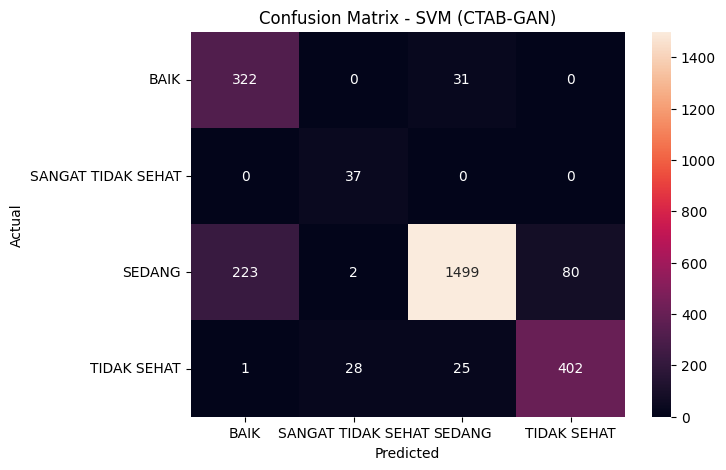

In [31]:
plt.figure(figsize=(7,5))
cm = confusion_matrix(y_test_enc_new, svm_pred)
sns.heatmap(cm, annot=True, fmt='d', 
            xticklabels=le_ctabgan.classes_, 
            yticklabels=le_ctabgan.classes_)
plt.title("Confusion Matrix - SVM (CTAB-GAN)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Naive Bayes

In [32]:
# --- B. NAIVE BAYES ---
print("\n" + "="*20 + " B. NAIVE BAYES " + "="*20)
print("Melatih Model Naive Bayes...")
nb_clf = GaussianNB()

nb_clf.fit(X_train_balanced, y_train_balanced)
nb_pred = nb_clf.predict(X_test_scaled_new)

# Evaluasi Naive Bayes
print("\n--- HASIL EVALUASI NAIVE BAYES (CTAB-GAN) ---")
print("Accuracy:", accuracy_score(y_test_enc_new, nb_pred))
print("Precision (weighted):", precision_score(y_test_enc_new, nb_pred, average='weighted'))
print("Recall (weighted):", recall_score(y_test_enc_new, nb_pred, average='weighted'))
print("F1-Score (weighted):", f1_score(y_test_enc_new, nb_pred, average='weighted'))

print("\nClassification Report Naive Bayes:")
print(classification_report(y_test_enc_new, nb_pred, target_names=le_ctabgan.classes_))


==================== B. NAIVE BAYES ====================
Melatih Model Naive Bayes...

--- HASIL EVALUASI NAIVE BAYES (CTAB-GAN) ---
Accuracy: 0.7524528301886793
Precision (weighted): 0.8185829711911665
Recall (weighted): 0.7524528301886793
F1-Score (weighted): 0.7644531969829484

Classification Report Naive Bayes:
                    precision    recall  f1-score   support

              BAIK       0.52      0.86      0.65       353
SANGAT TIDAK SEHAT       0.37      0.78      0.50        37
            SEDANG       0.94      0.71      0.80      1804
       TIDAK SEHAT       0.61      0.85      0.71       456

          accuracy                           0.75      2650
         macro avg       0.61      0.80      0.67      2650
      weighted avg       0.82      0.75      0.76      2650



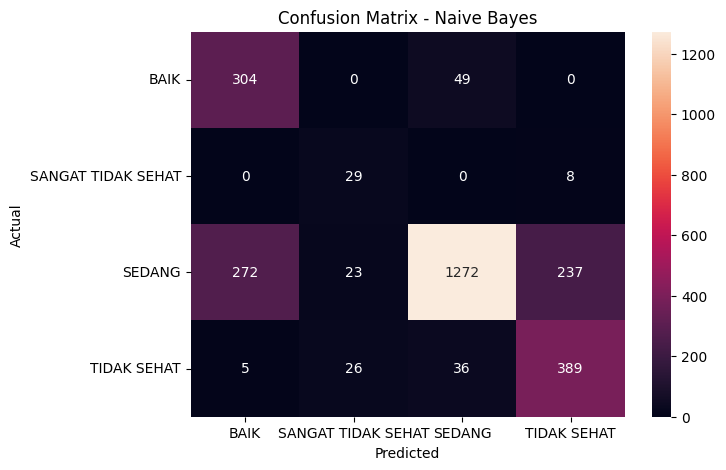

In [33]:
plt.figure(figsize=(7,5))
cm = confusion_matrix(y_test_enc_new, nb_pred)
sns.heatmap(cm, annot=True, fmt='d', 
            xticklabels=le_ctabgan.classes_, 
            yticklabels=le_ctabgan.classes_)
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Multinomial LogReg

In [34]:
# --- C. MULTINOMIAL LOGISTIC REGRESSION ---
print("\n" + "="*20 + " C. MULTINOMIAL LOGREG " + "="*20)
print("Melatih Model Logistic Regression...")
logreg_clf = LogisticRegression(
    multi_class='multinomial', 
    solver='lbfgs', 
    max_iter=1000, 
    random_state=42
)

logreg_clf.fit(X_train_balanced, y_train_balanced)
logreg_pred = logreg_clf.predict(X_test_scaled_new)

# Evaluasi LogReg
print("\n--- HASIL EVALUASI LOGREG (CTAB-GAN) ---")
print("Accuracy:", accuracy_score(y_test_enc_new, logreg_pred))
print("Precision (weighted):", precision_score(y_test_enc_new, logreg_pred, average='weighted'))
print("Recall (weighted):", recall_score(y_test_enc_new, logreg_pred, average='weighted'))
print("F1-Score (weighted):", f1_score(y_test_enc_new, logreg_pred, average='weighted'))

print("\nClassification Report LogReg:")
print(classification_report(y_test_enc_new, logreg_pred, target_names=le_ctabgan.classes_))


==================== C. MULTINOMIAL LOGREG ====================
Melatih Model Logistic Regression...

--- HASIL EVALUASI LOGREG (CTAB-GAN) ---
Accuracy: 0.7667924528301887
Precision (weighted): 0.8320831037084476
Recall (weighted): 0.7667924528301887
F1-Score (weighted): 0.7783580746176706

Classification Report LogReg:
                    precision    recall  f1-score   support

              BAIK       0.52      0.88      0.65       353
SANGAT TIDAK SEHAT       0.46      0.97      0.62        37
            SEDANG       0.95      0.72      0.82      1804
       TIDAK SEHAT       0.64      0.86      0.73       456

          accuracy                           0.77      2650
         macro avg       0.64      0.86      0.71      2650
      weighted avg       0.83      0.77      0.78      2650



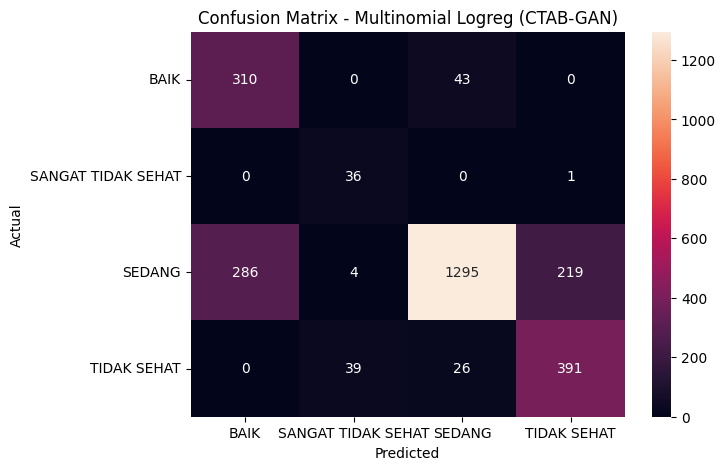

In [36]:
plt.figure(figsize=(7,5))
cm = confusion_matrix(y_test_enc_new, logreg_pred)
sns.heatmap(cm, annot=True, fmt='d', 
            xticklabels=le_ctabgan.classes_, 
            yticklabels=le_ctabgan.classes_)
plt.title("Confusion Matrix - Multinomial Logreg (CTAB-GAN)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### KNN

In [37]:
# --- D. KNN ---
print("\n" + "="*20 + " D. KNN " + "="*20)
print("Melatih Model KNN...")
knn_clf = KNeighborsClassifier(n_neighbors=5, weights='distance')

knn_clf.fit(X_train_balanced, y_train_balanced)
knn_pred = knn_clf.predict(X_test_scaled_new)

# Evaluasi KNN
print("\n--- HASIL EVALUASI KNN (CTAB-GAN) ---")
print("Accuracy:", accuracy_score(y_test_enc_new, knn_pred))
print("Precision (weighted):", precision_score(y_test_enc_new, knn_pred, average='weighted'))
print("Recall (weighted):", recall_score(y_test_enc_new, knn_pred, average='weighted'))
print("F1-Score (weighted):", f1_score(y_test_enc_new, knn_pred, average='weighted'))

print("\nClassification Report KNN:")
print(classification_report(y_test_enc_new, knn_pred, target_names=le_ctabgan.classes_))


==================== D. KNN ====================
Melatih Model KNN...

--- HASIL EVALUASI KNN (CTAB-GAN) ---
Accuracy: 0.9041509433962264
Precision (weighted): 0.9129267106279905
Recall (weighted): 0.9041509433962264
F1-Score (weighted): 0.9064449281888136

Classification Report KNN:
                    precision    recall  f1-score   support

              BAIK       0.73      0.91      0.81       353
SANGAT TIDAK SEHAT       0.69      0.95      0.80        37
            SEDANG       0.96      0.91      0.93      1804
       TIDAK SEHAT       0.89      0.88      0.89       456

          accuracy                           0.90      2650
         macro avg       0.82      0.91      0.86      2650
      weighted avg       0.91      0.90      0.91      2650



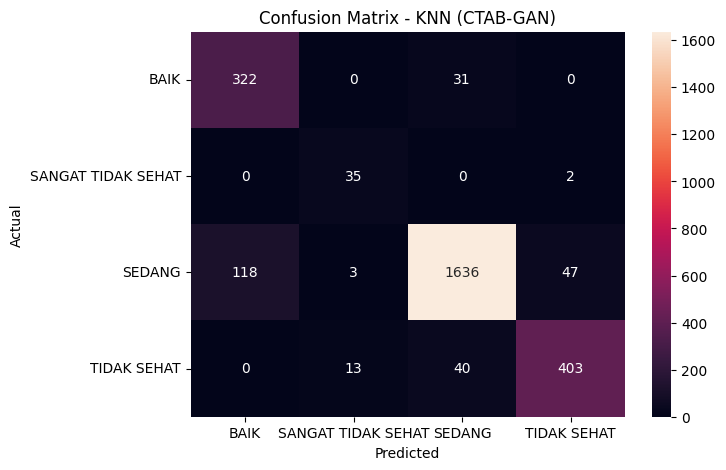

In [38]:
plt.figure(figsize=(7,5))
cm = confusion_matrix(y_test_enc_new, knn_pred)
sns.heatmap(cm, annot=True, fmt='d', 
            xticklabels=le_ctabgan.classes_, 
            yticklabels=le_ctabgan.classes_)
plt.title("Confusion Matrix - KNN (CTAB-GAN)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Stacking Ensamble

In [40]:
# --- E. STACKING ENSEMBLE ---
print("\n" + "="*20 + " E. STACKING ENSEMBLE " + "="*20)
print("Melatih Stacking Ensemble...")

estimators = [
    ('svm', svm_clf),
    ('nb', nb_clf),
    ('knn', knn_clf),
    ('logreg', logreg_clf)
]

stacking_clf = StackingClassifier(
    estimators=estimators, 
    final_estimator=LogisticRegression(),
    cv=5,      
    n_jobs=-1  
)

stacking_clf.fit(X_train_balanced, y_train_balanced)
stack_pred = stacking_clf.predict(X_test_scaled_new)

# Evaluasi Stacking
print("\n--- HASIL EVALUASI STACKING (CTAB-GAN) ---")
print("Accuracy:", accuracy_score(y_test_enc_new, stack_pred))
print("Precision (weighted):", precision_score(y_test_enc_new, stack_pred, average='weighted'))
print("Recall (weighted):", recall_score(y_test_enc_new, stack_pred, average='weighted'))
print("F1-Score (weighted):", f1_score(y_test_enc_new, stack_pred, average='weighted'))

print("\nClassification Report Stacking:")
print(classification_report(y_test_enc_new, stack_pred, target_names=le_ctabgan.classes_))


==================== E. STACKING ENSEMBLE ====================
Melatih Stacking Ensemble...

--- HASIL EVALUASI STACKING (CTAB-GAN) ---
Accuracy: 0.9052830188679245
Precision (weighted): 0.9205669819279462
Recall (weighted): 0.9052830188679245
F1-Score (weighted): 0.9084491332321897

Classification Report Stacking:
                    precision    recall  f1-score   support

              BAIK       0.71      0.95      0.81       353
SANGAT TIDAK SEHAT       0.69      0.97      0.81        37
            SEDANG       0.98      0.89      0.93      1804
       TIDAK SEHAT       0.87      0.94      0.90       456

          accuracy                           0.91      2650
         macro avg       0.81      0.94      0.86      2650
      weighted avg       0.92      0.91      0.91      2650



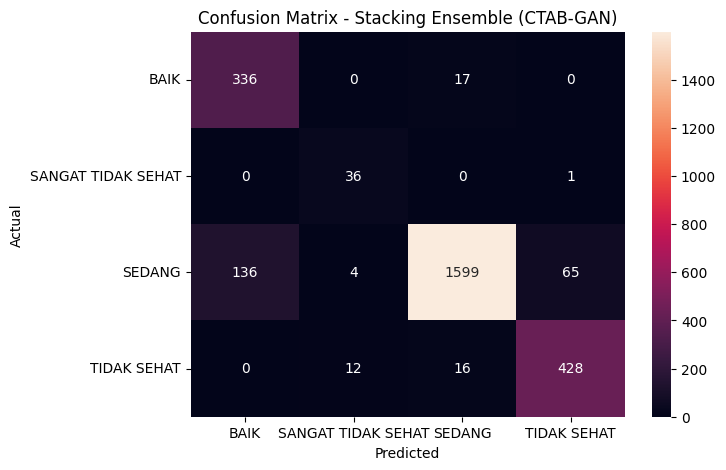

In [41]:
plt.figure(figsize=(7,5))
cm = confusion_matrix(y_test_enc_new, stack_pred)
sns.heatmap(cm, annot=True, fmt='d', 
            xticklabels=le_ctabgan.classes_, 
            yticklabels=le_ctabgan.classes_)
plt.title("Confusion Matrix - Stacking Ensemble (CTAB-GAN)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
